# <font color='blue'> Lending Club Case Study </font>

### <font color='brown'> Group Members: </font>
**1. Shebli Yusuf** \
**2. Lavanya M**

## Lending Club

Lending Club is a consumer finance company. Lending various types of loans like business loans, personal loans and financing of medical procedures to the customers. It is the largest online loan marketplace. Borrowers can easily request for lower interest rate loans. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile.

### Two types of risks are associated with the bank’s decision:

   1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

   2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

When a person applies for a loan, there are two types of decisions that could be taken by the company:

**1. Loan accepted:** If the company approves the loan, there are 3 possible scenarios described below:

   $\;\;\;\;\;\;$**Fully paid:** Applicant has fully paid the loan (the principal and the interest rate)

   $\;\;\;\;\;\;$**Current:** Applicant is in the process of paying the installments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as $\;\;\;\;\;\;$'defaulted'.

   $\;\;\;\;\;\;$**Charged-off:** Applicant has not paid the installments in due time for a long period of time, i.e. he/she has defaulted on the loan 

**2. Loan rejected:** The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

## Business Objective

Like most other lending companies, lending loans to **‘risky’** applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as **'charged-off'** are the **'defaulters'**.

The company wants to understand the **driving factors (or driver variables) behind loan default**, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

## Data

The complete **loan data** for all loans issued through the time period **2007 to 2011**.
<br> We also have a **data dictionary** which describes the meaning of these variables.

## Exploratory Data Analysis

In [33]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [34]:
# Load data and create dataframe
df = pd.read_csv('loan.csv', encoding = "ISO-8859-1", low_memory=False)

In [35]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Data Cleaning

We will look percentage of missing values in our database and remove the columns with more than 50% missing values

In [37]:
percentage_missing = round(100*(df.isnull()
                                .sum()/len(df.id)), 2)
missing = percentage_missing.loc[percentage_missing >= 50].sort_values()

In [38]:
missing_columns = list(dict(missing).keys())

In [39]:
len(missing_columns)

57

In [40]:
# Drop columns with more than 50% missing values in column
df = df.drop(columns=missing_columns,axis=1)

In [41]:
# Check the number of columns with any missing values
percentage_missing = round(100*(df.isnull().sum()/len(df.id)), 2)
columns_with_null_value = percentage_missing.loc[percentage_missing > 0]

In [42]:
columns_with_null_value.sort_values()

last_credit_pull_d             0.01
title                          0.03
tax_liens                      0.10
revol_util                     0.13
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
last_pymnt_d                   0.18
pub_rec_bankruptcies           1.75
emp_length                     2.71
emp_title                      6.19
desc                          32.58
dtype: float64

There are broadly **three types of variables** –
1. Variables which are related to the applicant (**demographic variables** such as age, occupation, employment details etc.), 
2. **Loan characteristics** (amount of loan, interest rate, purpose of loan etc.) and 
3. **Customer behavior variables** (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.).


We will remove the customer behavior variables as they are generated after the loan is approved.

In [43]:
s = 'delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d'

In [44]:
customer_behavior_variables_list = s.split(',')

In [45]:
customer_behavior_variables_list

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d']

In [46]:
# Dropping customer behavior columns
df = df.drop(customer_behavior_variables_list, axis = 1)

**Zero variance columns identification**

In [47]:
print("---- Total Rows ---" )
print(len(df))

single_value_columns = []
for c in df.columns:
  count = df[c].nunique()
  if count <= 1:
    print("---- %s ---" % c)
    print()
    print(count)
    single_value_columns.append(c)

---- Total Rows ---
39717
---- pymnt_plan ---

1
---- initial_list_status ---

1
---- collections_12_mths_ex_med ---

1
---- policy_code ---

1
---- application_type ---

1
---- acc_now_delinq ---

1
---- chargeoff_within_12_mths ---

1
---- delinq_amnt ---

1
---- tax_liens ---

1


In [48]:
# Drop zero variance columns
df = df.drop(single_value_columns, axis = 1)

In [49]:
print("---- Total Rows ---" )
print(len(df))
print()
df.nunique().sort_values()

---- Total Rows ---
39717



term                        2
pub_rec_bankruptcies        3
loan_status                 3
verification_status         3
home_ownership              5
grade                       7
emp_length                 11
purpose                    14
sub_grade                  35
addr_state                 50
issue_d                    55
int_rate                  371
zip_code                  823
loan_amnt                 885
funded_amnt              1041
dti                      2868
annual_inc               5318
funded_amnt_inv          8205
installment             15383
title                   19615
desc                    26527
emp_title               28820
member_id               39717
url                     39717
id                      39717
dtype: int64

In [50]:
# Drop the columns with unique values and unnecessary data
df = df.drop(["id", "member_id", "url"], axis = 1)

## Analysis

**'desc'** column define the description provided by the borrower. It does not give us the information related to business solution. We will drop this column.

In [51]:
# Drop "desc" column
df = df.drop("desc", axis=1)

**emp_title** - The job title supplied by the Borrower when applying for the loan. This column does not help in deriving the default and non-defaulty for the bank.

In [20]:
df["emp_title"].value_counts()

US Army                                134
Bank of America                        109
IBM                                     66
AT&T                                    59
Kaiser Permanente                       56
                                      ... 
Chesterfield County Virginia             1
Topway Enterprise                        1
four seasons hotel                       1
southwyck golf club - century golf       1
electrical test instruments              1
Name: emp_title, Length: 28820, dtype: int64

In [21]:
len(df[df["emp_title"].isnull()])

2459

**emp_length** - Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

In [22]:
df['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [23]:
df["emp_length"].isnull().sum()

1075

In [24]:
# Drop row with emp_length and emp_title as null values as we cannot impute these values
df = df[~((df["emp_length"].isnull()) & (df["emp_title"].isnull()))]

In [25]:
df["emp_length"].isnull().sum()

56

In [26]:
# Drop row with emp_length as null values as we cannot impute these values
df = df[~(df["emp_length"].isnull())]

In [27]:
df['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [28]:
# Drop emp_title column as it does not helps in identifying the defaulter and non-defaulters
df = df.drop("emp_title", axis = 1)

In [29]:
len(df)

38642

**pub_rec_bankruptcies** - Number of public record bankruptcies

In [30]:
df["pub_rec_bankruptcies"].value_counts()

0.0    36375
1.0     1563
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [31]:
# "pub_rec_bankruptcies" column is a categorical variable. We will impute this column with the median of itself.
df["pub_rec_bankruptcies"] = df["pub_rec_bankruptcies"].fillna(df["pub_rec_bankruptcies"].median())

In [32]:
df["pub_rec_bankruptcies"].isnull().sum()

0

In [33]:
df["pub_rec_bankruptcies"].value_counts()

0.0    37072
1.0     1563
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

#### title - The loan title provided by the borrower

In [34]:
df.title

0                         Computer
1                             bike
2             real estate business
3                         personel
4                         Personal
                   ...            
39712             Home Improvement
39713    Retiring credit card debt
39714       MBA Loan Consolidation
39715                     JAL Loan
39716           Consolidation Loan
Name: title, Length: 38642, dtype: object

We can drop this column as this is provided by the borrower and it can have multiple similar meaning words or sentences.

In [35]:
df = df.drop(['title'], axis = 1)

#### zip_code - The first 3 numbers of the zip code provided by the borrower in the loan application.

In [36]:
df.zip_code

0        860xx
1        309xx
2        606xx
3        917xx
4        972xx
         ...  
39712    802xx
39713    274xx
39714    017xx
39715    208xx
39716    027xx
Name: zip_code, Length: 38642, dtype: object

We can drop this column as this contains only the first 3 numbers of zip code provided by borrower

In [37]:
df = df.drop(['zip_code'], axis = 1)

## <font color='green'> Univariate Analysis<font>

In [44]:
# Function to label the count on top of each bar in graph
def label_values(ax, spacing=5):
    for rect in ax.patches:
        
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        
        va = 'bottom'

        if y_value < 0:
            space *= -1
            va = 'top'

        label = "{:.2f}".format(y_value)
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                      

#### loan_status - Current status of the loan

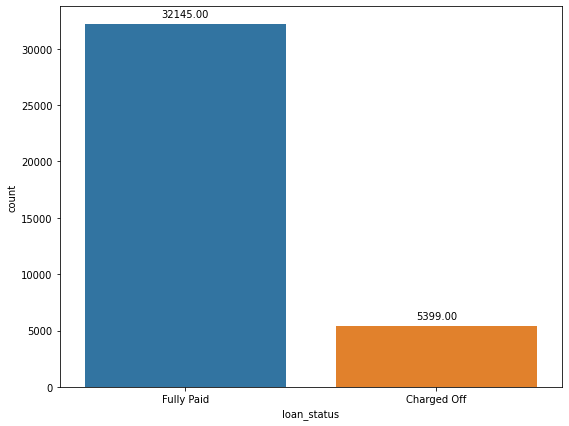

In [45]:
plt.figure(figsize=(9,7))
ax = sns.countplot(x = df.loan_status)
label_values(ax)
plt.show()

In [46]:
#For this case study, we will wave off 'current' loan status as we just need consider the cases where application is not approved.
df = df[df.loan_status.isin(['Fully Paid','Charged Off'])]

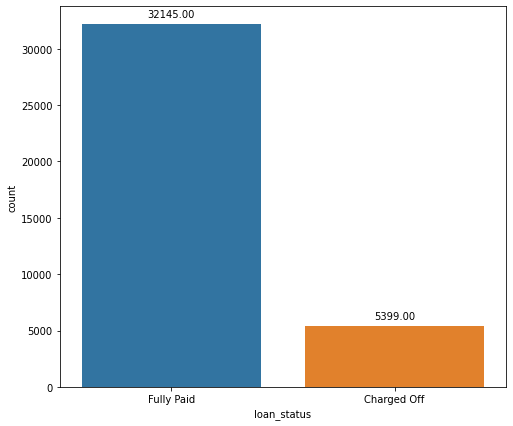

In [47]:
# Count plot of loan status
plt.figure(figsize=(8,7))
ax = sns.countplot(x = df.loan_status)
label_values(ax)
plt.show()

#### loan_amnt - The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

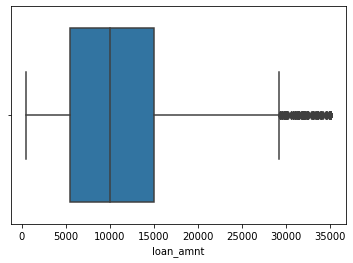

In [48]:
#Loan Amnt Box Plot
sns.boxplot(x = df.loan_amnt)
plt.show()

In [49]:
df.loan_amnt.describe()

count    37544.000000
mean     11119.329986
std       7354.098954
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [50]:
len(df[df.loan_amnt > df.loan_amnt.quantile(0.90)])

3755

There are high number (Around 10%) of outliers in loan amount required by customers.

#### funded_amnt - The total amount committed to that loan at that point in time.

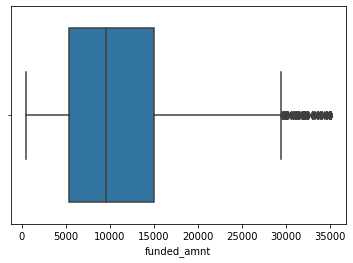

In [51]:
sns.boxplot(x = df.funded_amnt)
plt.show()

In [52]:
df.funded_amnt.describe()

count    37544.000000
mean     10853.560489
std       7096.316776
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [53]:
len(df[df.funded_amnt > df.funded_amnt.quantile(0.90)])

3754

There are high number (Around 10%) of outliers in loan funded amount required by customers.

#### funded_amnt_inv - The total amount committed by investors for that loan at that point in time.

In [54]:
df["funded_amnt_inv"] = df.loc[:,"funded_amnt_inv"].apply(lambda x: int(x))

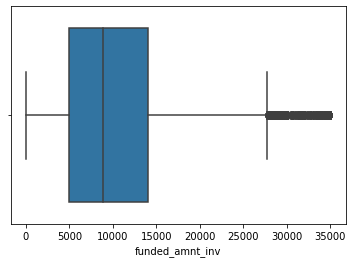

In [55]:
sns.boxplot(x = df.funded_amnt_inv)
plt.show()

In [56]:
df.funded_amnt_inv.describe()

count    37544.000000
mean     10280.405844
std       7034.103381
min          0.000000
25%       5000.000000
50%       8850.000000
75%      14075.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [57]:
len(df[df.funded_amnt_inv > df.funded_amnt_inv.quantile(0.90)])

3467

There are high number (Around 9%) of outliers in loan amount required by customers.

#### term - The number of payments on the loan. Values are in months and can be either 36 or 60.

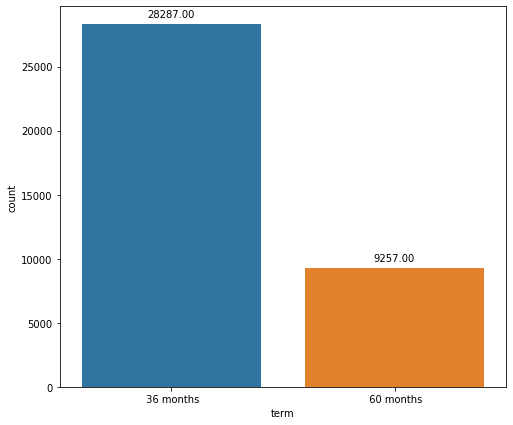

In [58]:
plt.figure(figsize=(8,7))
ax = sns.countplot(x=df["term"])
label_values(ax)
plt.show()

In [59]:
len(df[df["term"]==" 36 months"])*100/len(df)

75.34359684636694

Around 75% customers are choosing 36 months term period.

#### int_rate - Interest Rate on the loan

In [60]:
# Convert 15.08% (object type) to 15.08 (float type)
df.int_rate = df.loc[:, 'int_rate'].apply(lambda x: float(str(x[:-1])))

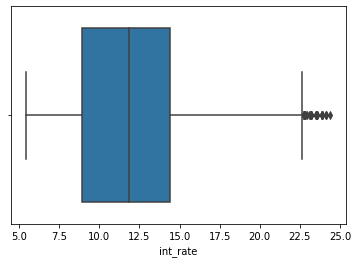

In [61]:
sns.boxplot(x = df.int_rate)
plt.show()

In [62]:
df.int_rate.describe()

count    37544.000000
mean        11.963319
std          3.683012
min          5.420000
25%          8.940000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

In [63]:
len(df[df.int_rate > df.int_rate.quantile(0.90)]), df.int_rate.quantile(0.90)

(3682, 16.82)

Around 10% people has received high interest rate i.e.  3682 people have paid greater than 16.82 interest rate.

#### installment - The monthly payment owed by the borrower if the loan originates.

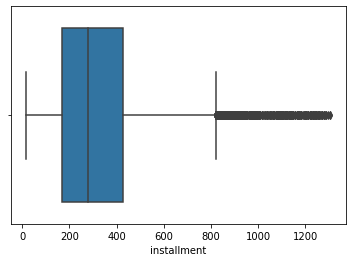

In [64]:
sns.boxplot(x = df.installment)
plt.show()

In [65]:
df.installment.describe()

count    37544.000000
mean       324.650164
std        208.901055
min         15.690000
25%        167.370000
50%        280.000000
75%        428.942500
max       1305.190000
Name: installment, dtype: float64

In [66]:
len(df[df["installment"] > df["installment"].quantile(.95)])

1878

We have high number of outliers in our installment data column

#### grade - LC assigned loan grade

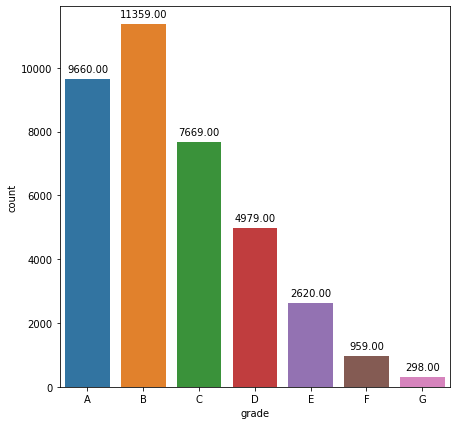

In [67]:
plt.figure(figsize=(7, 7))
ax = sns.countplot(x = df.grade, order=['A','B','C','D','E','F','G'])
label_values(ax)
plt.show()

In [68]:
len(df[df["grade"]=='B'])*100/len(df), len(df[df["grade"]=='A'])*100/len(df)

(30.255167270402726, 25.729810355849136)

Around 30% customers took B grade loan followed by 'A' (Around 25%).

#### sub_grade - LC assigned loan subgrade

In [69]:
# Get all subgrade in order
sub_grade_order = []
for char in ['A','B','C','D','E','F','G']:
    for i in range(1, 6):
        sub_grade_order.append(char+str(i))

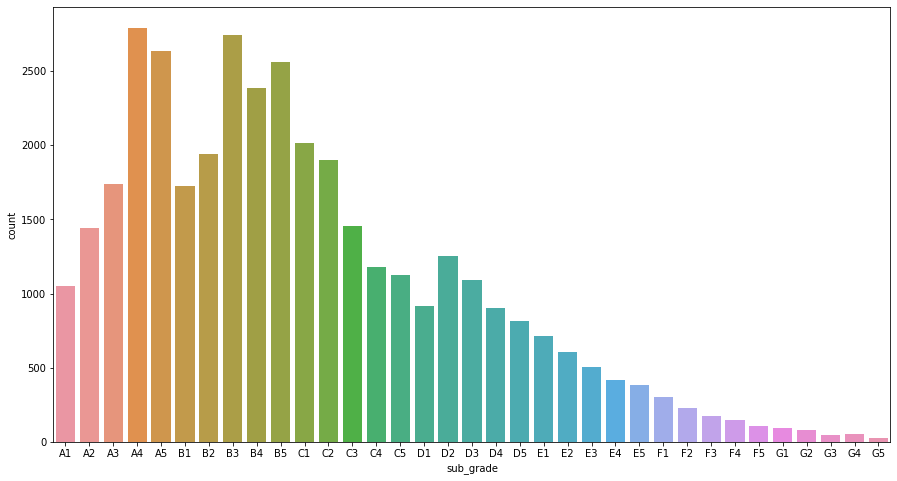

In [71]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x = df.sub_grade, order= sub_grade_order)
plt.show()

We have higher number of loans in 'A4' subgrade followed by 'B4', 'A5'.

#### emp_length - Employment length in years.

Convert each category value to int. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

In [72]:
def convert_years_to_int(x):
    x = str(x)
    if x == "< 1 year":
        return 0
    elif x == "10+ years":
        return 10
    else:
        return int(x[0])

In [73]:
emp_length = df.emp_length.apply(convert_years_to_int)

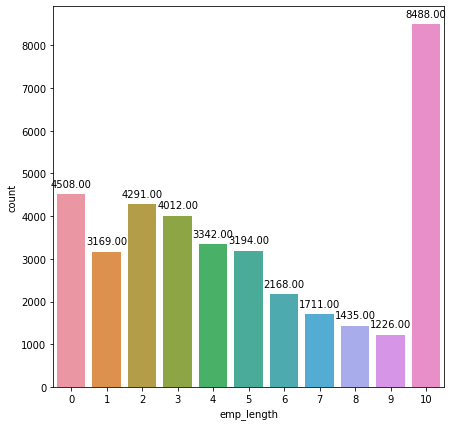

In [74]:
plt.figure(figsize=(7, 7))
ax = sns.countplot(x = emp_length)
label_values(ax)
plt.show()

#### home_ownership - The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

In [69]:
df.home_ownership.value_counts()

RENT        18078
MORTGAGE    16595
OWN          2770
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [70]:
# Drop the rows which have NONE as home ownership as this needs to be treated as Null values
df = df[df["home_ownership"].isin(['RENT', 'OWN', 'MORTGAGE', 'OTHER'])]

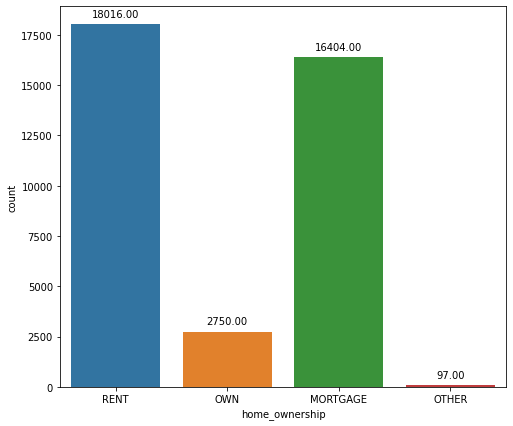

In [90]:
plt.figure(figsize=(8,7))
ax = sns.countplot(x = df.home_ownership)
label_values(ax)
plt.show()

Most borroweres taking loan has rented or mortagage homes.

#### annual_inc - The self-reported annual income provided by the borrower during registration.

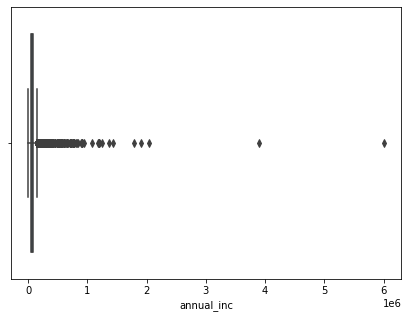

In [72]:
plt.figure(figsize=(7, 5))
sns.boxplot(x = df.annual_inc)
plt.show()

In [73]:
df.annual_inc.describe()

count    3.754100e+04
mean     6.940618e+04
std      6.467839e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

The annual income reprted by the customers ranges from min of 4,000 to max of 6,000,000. \
Median annual income is around 60,000.
<br>Most people have an annual income less than 115000

In [74]:
# We should get rid of outliers to analyze annual income. 
# We will keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
df = df[np.abs(df.annual_inc-df.annual_inc.mean()) <= (3*df.annual_inc.std())]

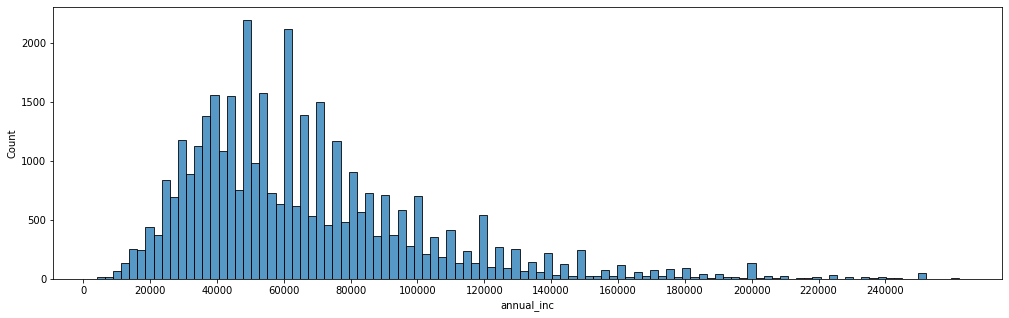

In [75]:
plt.figure(figsize=(17, 5))
sns.histplot(df['annual_inc'])
plt.xticks(np.arange(0, 260000, 20000))
plt.show()

In [76]:
len(df[ df["annual_inc"] > df["annual_inc"].quantile(0.90)])

3715

In [77]:
df["annual_inc"].describe()

count     37267.000000
mean      66412.228656
std       36394.235503
min        4000.000000
25%       41000.000000
50%       59100.000000
75%       82000.000000
max      262000.000000
Name: annual_inc, dtype: float64

High number of outliers are in annual income in our dataset

#### verification_status - Indicates if income was verified by LC, not verified, or if the income source was verified

In [78]:
df.verification_status.value_counts()

Not Verified       16206
Verified           11654
Source Verified     9407
Name: verification_status, dtype: int64

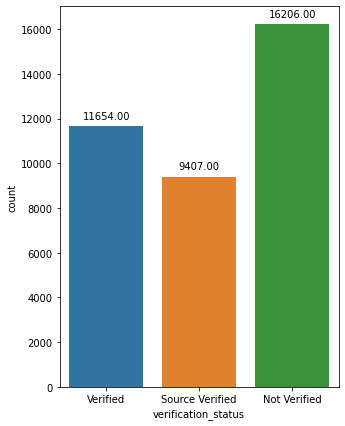

In [79]:
plt.figure(figsize=(5, 7))
ax = sns.countplot(x = df.verification_status)
label_values(ax)
plt.show()

In [80]:
len(df[df["verification_status"]=="Not Verified"])*100/len(df)

43.48619422008748

Around 43% customers are not verified.

#### issue_d - The month which the loan was funded

Issue date on it's own does not give us significant information but we will consider year for our analysis.

#### Derived: Issue Date Year

In [81]:
df["issue_d_year"] = df["issue_d"].apply(lambda x: "20"+x[-2:])

#### Number of loan granted over the years

In [82]:
fully_paid_dataframe = df[df['loan_status']=='Fully Paid']
charged_off_dataframe = df[~(df['loan_status']=='Fully Paid')]

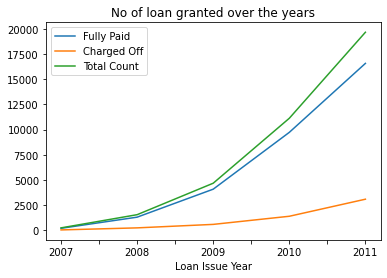

In [83]:
group = fully_paid_dataframe.groupby(by='issue_d_year').count()['loan_status']
group1 = charged_off_dataframe.groupby(by='issue_d_year').count()['loan_status']
group2 = df.groupby(by='issue_d_year').count()['loan_status']

group.plot.line()
group1.plot.line()
group2.plot.line()

plt.legend(labels=['Fully Paid','Charged Off', 'Total Count'])

plt.title('No of loan granted over the years')
plt.xlabel('Loan Issue Year')
plt.show()

Over the period of time, we could see the fully paid customer are very height comparatively to the changed off customers. 

#### purpose - A category provided by the borrower for the loan request. 

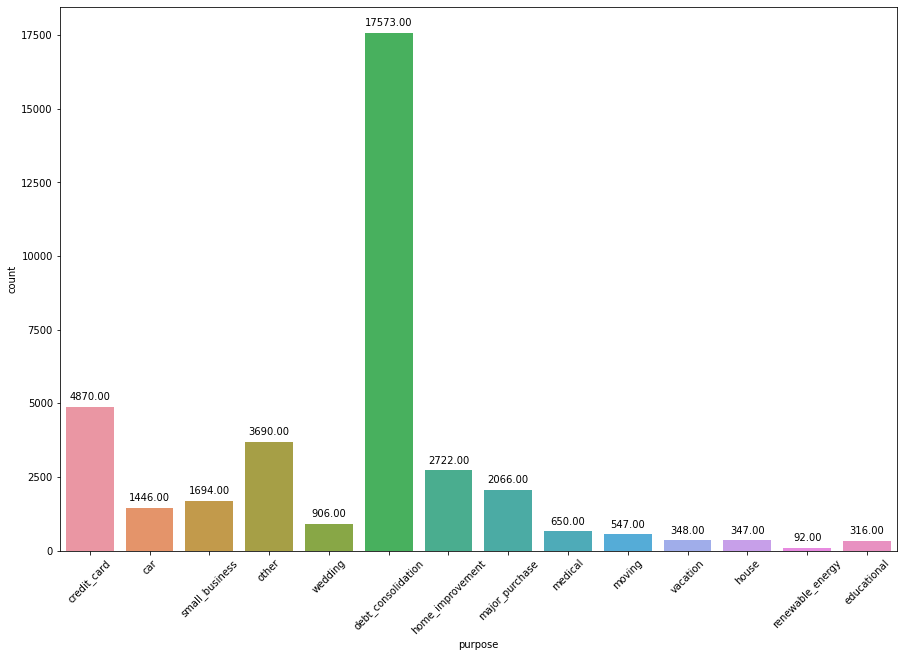

In [93]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x = df.purpose)
label_values(ax)
plt.xticks(rotation=45)
plt.show()

Higher number of people taking loans for the purpose of debt_consolidation followed by credit card.

#### addr_state - The state provided by the borrower in the loan application

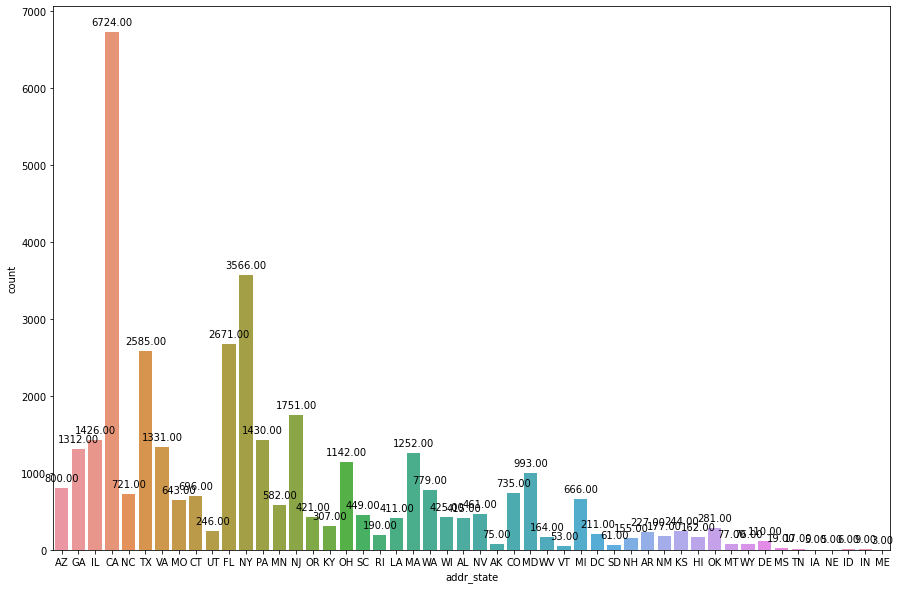

In [85]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x = df.addr_state)
label_values(ax)
plt.show()

#### dti - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

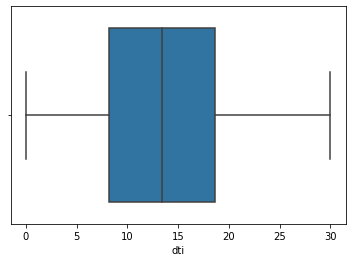

In [86]:
sns.boxplot(x = df.dti)
plt.show()

In [87]:
df.dti.describe()

count    37267.000000
mean        13.333547
std          6.646134
min          0.000000
25%          8.220000
50%         13.430000
75%         18.590000
max         29.990000
Name: dti, dtype: float64

In [95]:
len(df[df["dti"] > df["dti"].quantile(.90)])

3725

Around 68% dti lies between 8% to 18%.

#### pub_rec_bankruptcies - Number of public record bankruptcies

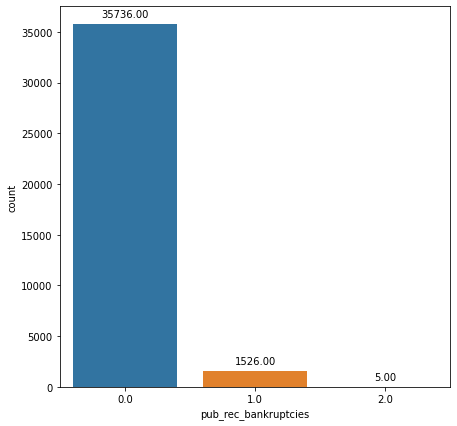

In [96]:
plt.figure(figsize=(7, 7))
ax = sns.countplot(x = df.pub_rec_bankruptcies)
label_values(ax)
plt.show()

In [97]:
df.pub_rec_bankruptcies.describe()

count    37267.000000
mean         0.041216
std          0.199466
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [98]:
len(df[df["pub_rec_bankruptcies"]==0.0])*100/len(df), len(df[df["pub_rec_bankruptcies"]==1.0])*100/len(df) 

(95.8918077655835, 4.0947755386803335)

Around 96% has 0.0 of number of public record bankruptcies. \
Around 4% has 1.0 of number of public record bankruptcies. \
Around 1% has 2.0 of number of public record bankruptcies.

Continuos variables - 'loan_amount', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'dti' \
    1. Day - 'issue_d' \
Categorical variables - 'term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status',  'loan_status', 'purpose', 'addr_state', 'pub_rec_bankruptcies', 'issue_d_year'


### <font color='green'> Segmented Univariate Analysis </font>

##### Loan Status vs Term

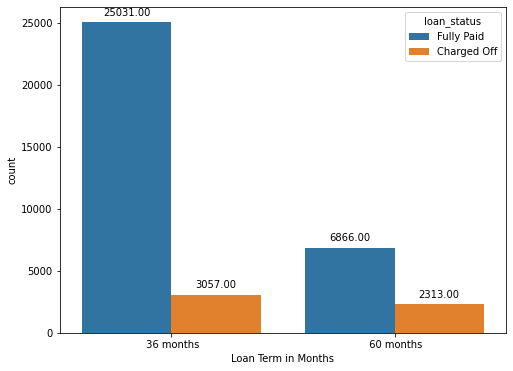

In [99]:
plt.figure(figsize=(8, 6))
ax = sns.countplot( x="term", hue='loan_status', data=df)
plt.xlabel('Loan Term in Months')
label_values(ax)
plt.show() 

Mostly who choose 36 month term period they have higher chances that they will fully pay the loan amount in comparision to 60 month term period.

##### Loan Status v/s Interest Rate

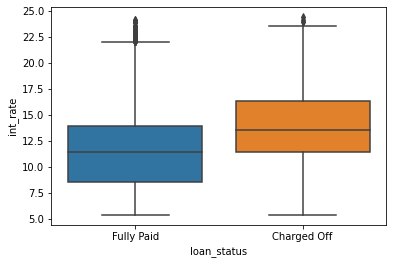

In [100]:
sns.boxplot(x='loan_status', y='int_rate', data=df)
plt.show()

Higher the interest off higher is the probability for charged off.

##### emp_length v/s loan_status

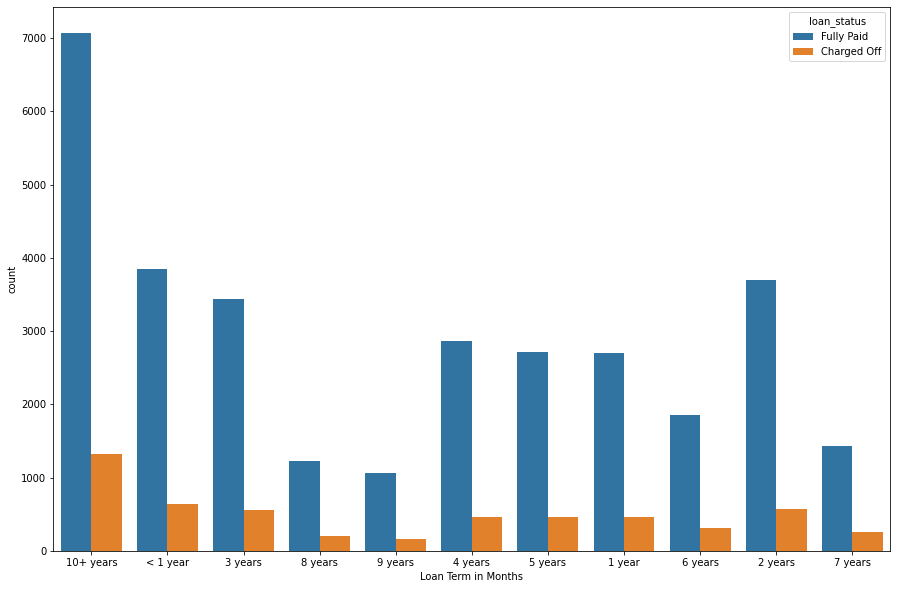

In [101]:
plt.figure(figsize=(15, 10))
sns.countplot( x="emp_length", hue='loan_status', data=df)
plt.xlabel('Loan Term in Months')
plt.show()

If the employment length is greater than 10 years then there is high probability of defaulter as compared to other years.

#### Loan Amount vs Loan status

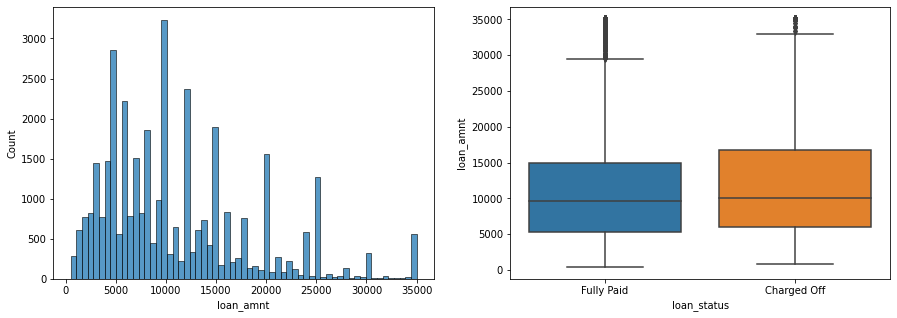

In [102]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
ax = sns.histplot(df['loan_amnt'])
plt.subplot(1, 2, 2)
sns.boxplot(x=df['loan_status'], y=df['loan_amnt'], data=df)
plt.show()

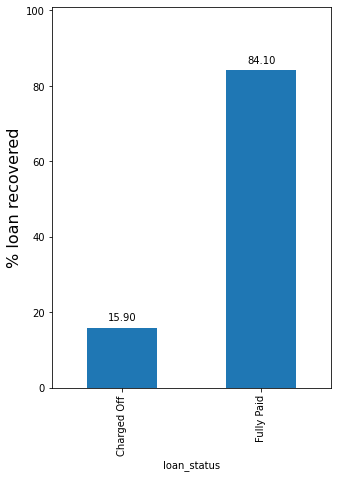

In [103]:
plt.figure(figsize=(5,7))
ax = (df.groupby('loan_status')["loan_amnt"].sum() * 100 / df.loan_amnt.sum()).plot.bar()
ax.set_ylabel('% loan recovered', fontsize=16)
plt.margins(0.2, 0.2)
label_values(ax)

When the loan amount is too high we can encounter many outliers in the fully paid customer comparatively to the charged off customers i.e. if the loan amount is high there is high probability that person will pay off loan.

Around 16% of loans are not paid.

#### Loans status vs Purpose

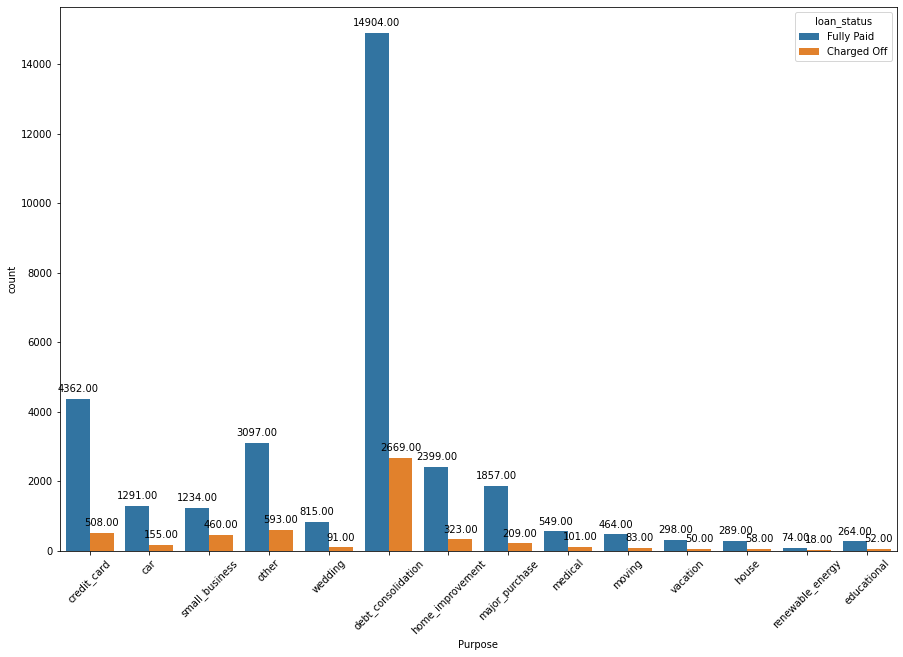

In [104]:
plt.figure(figsize=(15, 10))
ax = sns.countplot(x="purpose", hue='loan_status', data=df)
plt.xlabel('Purpose')
label_values(ax)
plt.xticks(rotation=45)
plt.show()

Maximum number of loans are for debt consolidation, followed by credit card

#### Loan status v/s home ownership

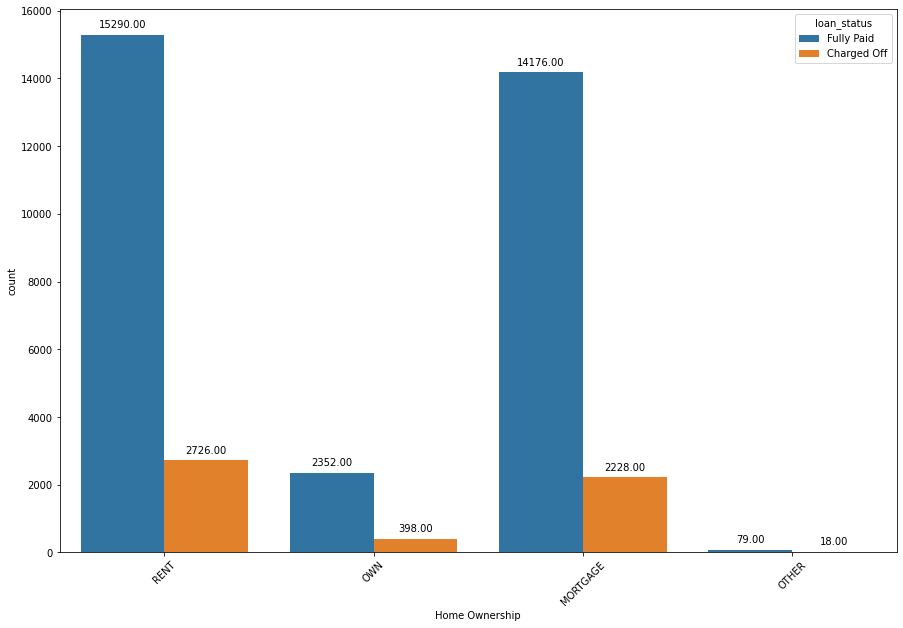

In [105]:
plt.figure(figsize=(15, 10))
ax = sns.countplot(x="home_ownership", hue='loan_status', data=df)
plt.xlabel('Home Ownership')
label_values(ax)
plt.xticks(rotation=45)
plt.show()

Most customers taking loan has rented or mortagage homes and around 16% of those people will not be able to pay back loan amount.

#### Annual Income v/s Loan Status

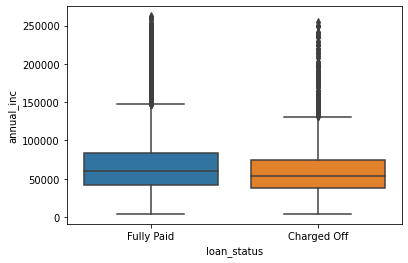

In [106]:
sns.boxplot(x=df['loan_status'], y=df['annual_inc'], data=df)
plt.show()

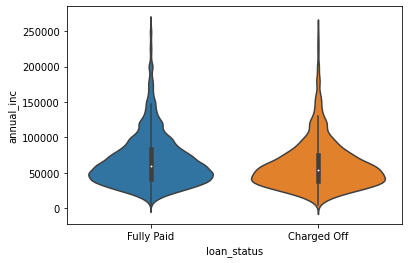

In [107]:
sns.violinplot(x=df['loan_status'], y=df['annual_inc'], data=df)
plt.show()

#### Public Record Bankruptcies v/s Loan Status

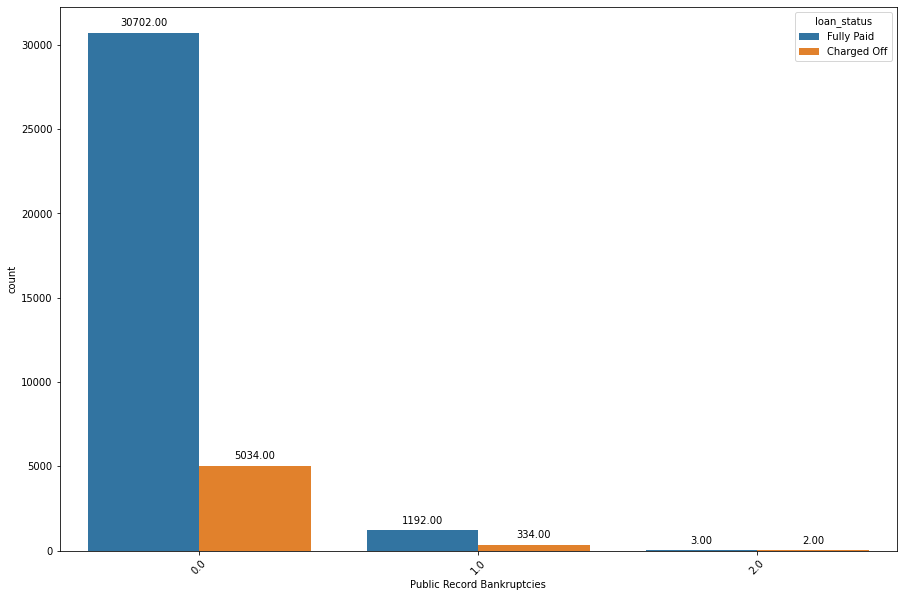

In [108]:
plt.figure(figsize=(15, 10))
ax = sns.countplot(x="pub_rec_bankruptcies", hue='loan_status', data=df)
plt.xlabel('Public Record Bankruptcies')
label_values(ax)
plt.xticks(rotation=45)
plt.show()

People with zero public record bankruptcies have higher tendency of fully paying.

#### DTI v/s Loan Status

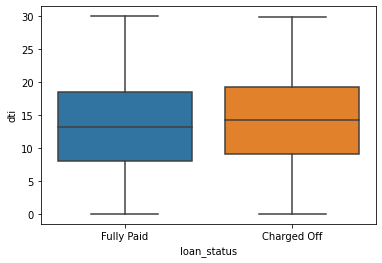

In [109]:
sns.boxplot(x=df['loan_status'], y=df['dti'], data=df)
plt.show()

DTI has not much effect on the tendency of borrower towards defaulters.

#### Verification Status v/s Loan Status

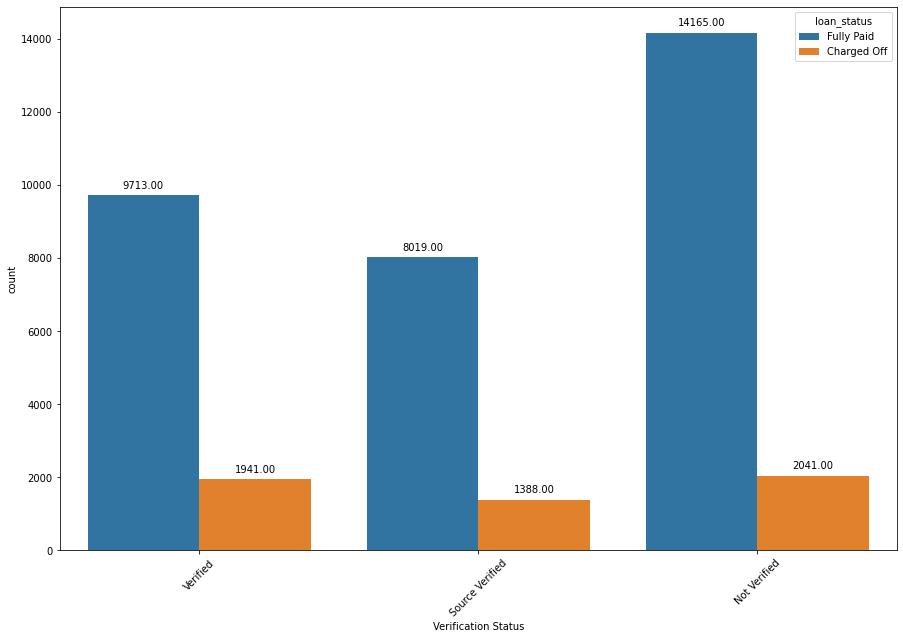

In [110]:
plt.figure(figsize=(15, 10))
ax = sns.countplot(x="verification_status", hue='loan_status', data=df)
plt.xlabel('Verification Status')
label_values(ax)
plt.xticks(rotation=45)
plt.show()

Type of verification is not affecting the count of defaulters.

#### Term vs Interest Rate

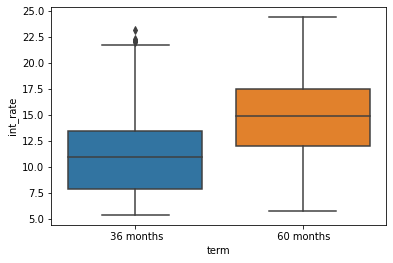

In [111]:
sns.boxplot(x=df['term'], y=df['int_rate'], data=df)
plt.show()

Interest Rate is higher when it comes to higher term period.

#### Interest Rate v/s Grade

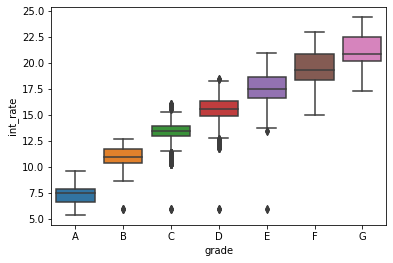

In [112]:
sns.boxplot(x=df['grade'], y=df['int_rate'], data=df, order=['A','B','C','D','E','F','G'])
plt.show()

With increasing grade the value of interest rate also increases.

#### Interest Rate v/s subgrade

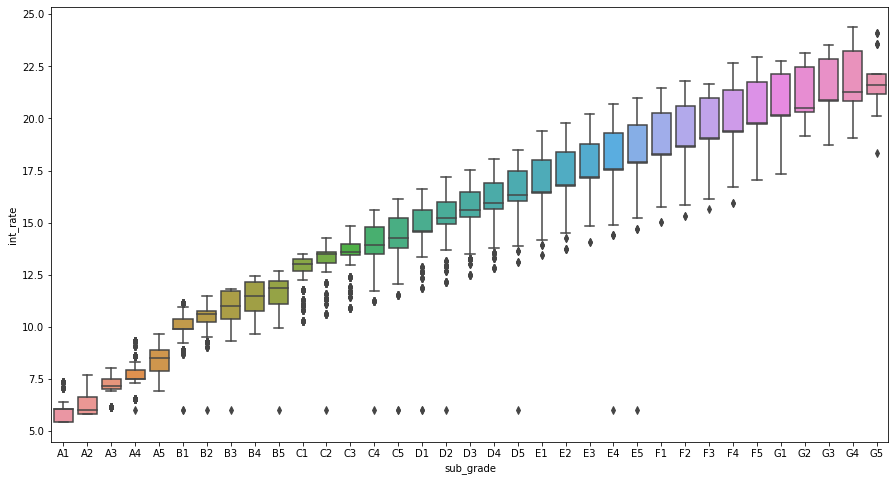

In [113]:
plt.figure(figsize=(15, 8))
sns.boxplot(x=df['sub_grade'], y=df['int_rate'], data=df,order=sub_grade_order)
plt.show()

With increasing sub grade the value of interest rate also increases.

#### Term Month v/s Purpose

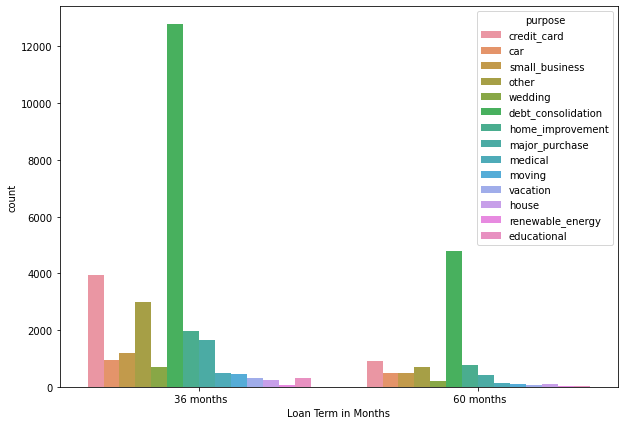

In [114]:
plt.figure(figsize=(10,7))
sns.countplot( x="term", hue='purpose', data=df)
plt.xlabel('Loan Term in Months')
plt.show()

#### Grade v/s Loan Status

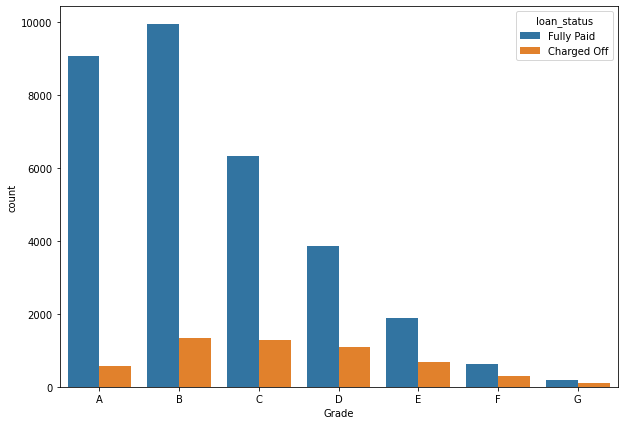

In [133]:
plt.figure(figsize=(10,7))
sns.countplot( x="grade", hue='loan_status', data=df, order=['A','B', 'C','D','E','F','G'Bivariate])
plt.xlabel('Grade')
plt.show()

#### Loan Amount v/s Grade

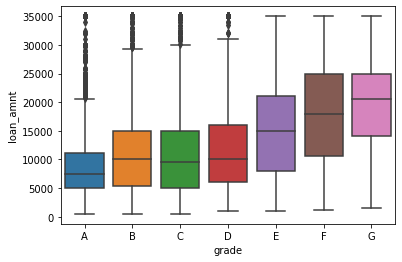

In [115]:
sns.boxplot(x=df['grade'], y=df['loan_amnt'], data=df, order=['A','B','C','D','E','F','G'])
plt.show()

Larger loans generally appear to be given a lower grade, with the median loan amount for a grade G loan being almost 10000 higher than that of a grade A, B, or C loan.

#### Annual Income v/s Grade

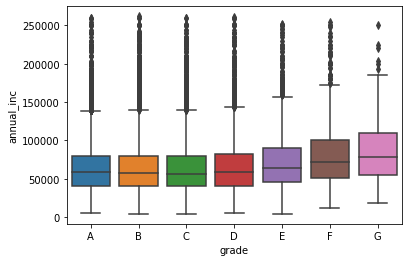

In [116]:
sns.boxplot(x=df['grade'], y=df['annual_inc'], data=df, order=['A','B','C','D','E','F','G'])
plt.show()

Higher income people tends to take higher graded loans.

#### Loan Amount and Address State

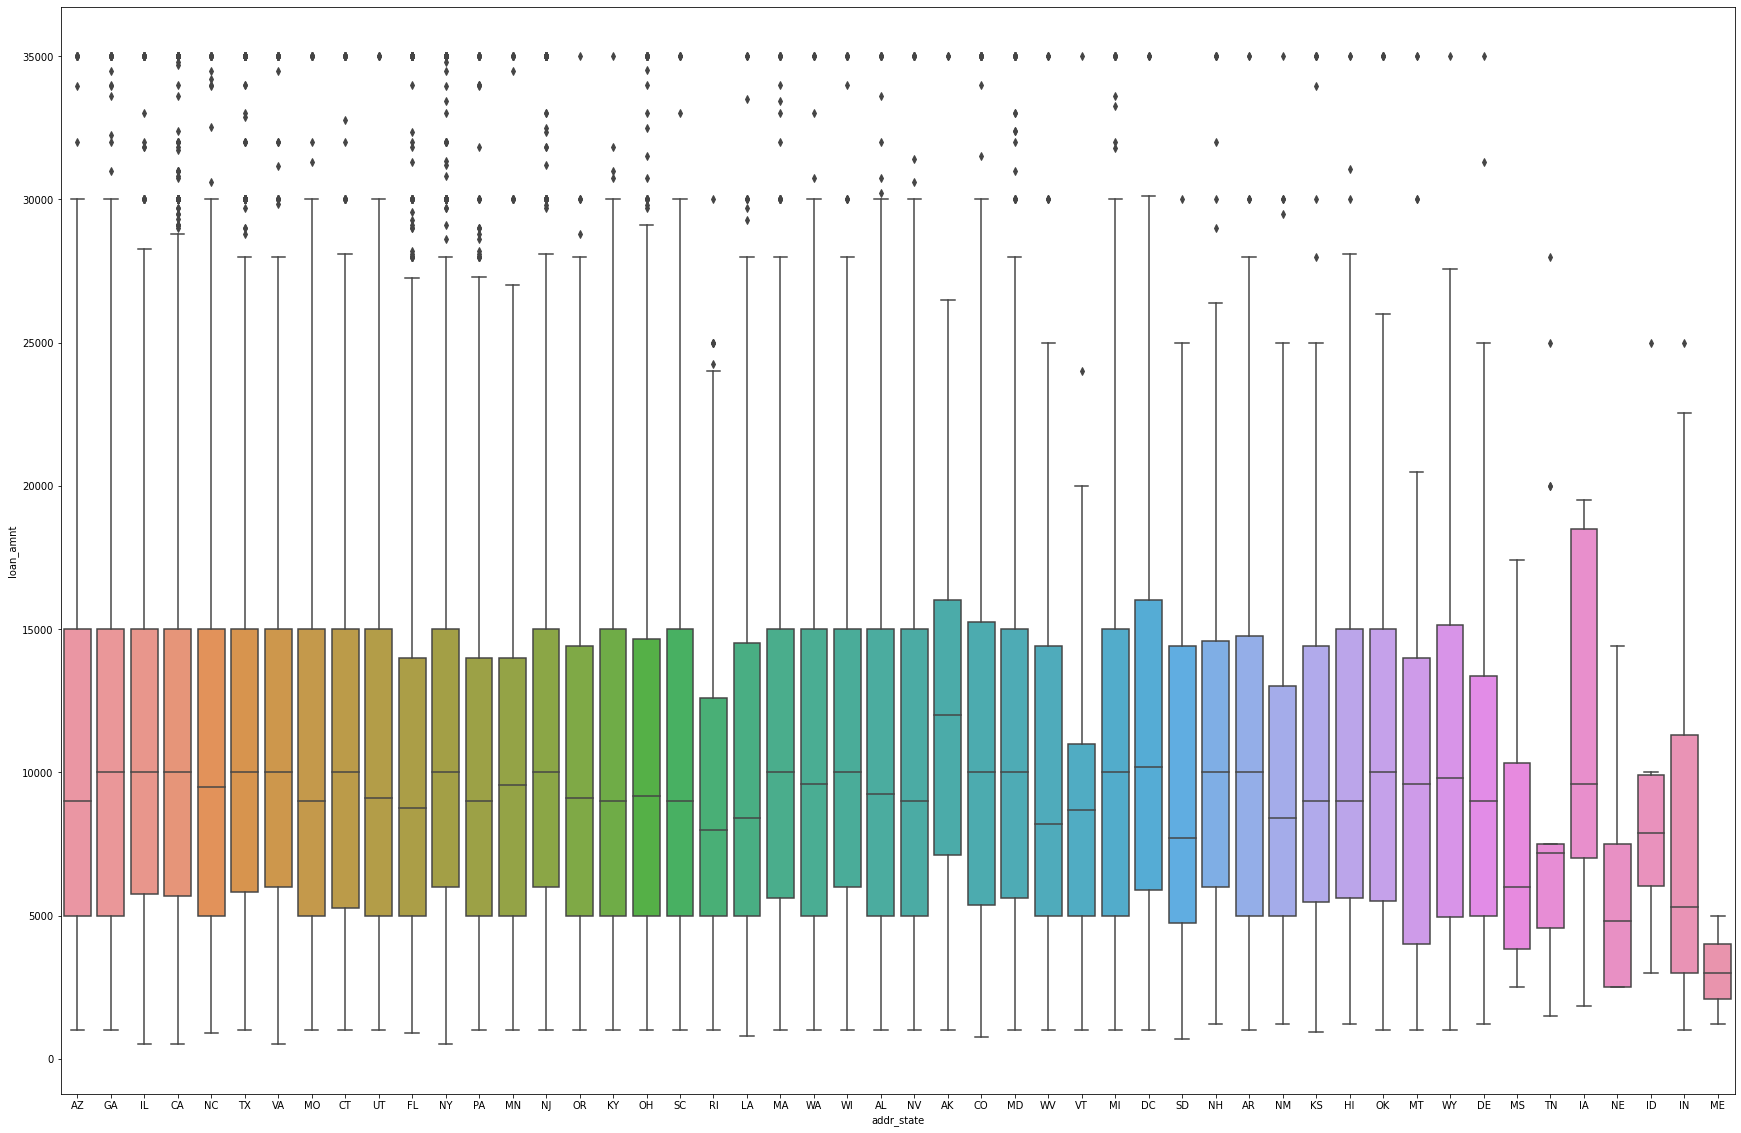

In [140]:
plt.figure(figsize=(30, 20))
sns.boxplot(x=df['addr_state'], y=df['loan_amnt'], data=df)
plt.show()

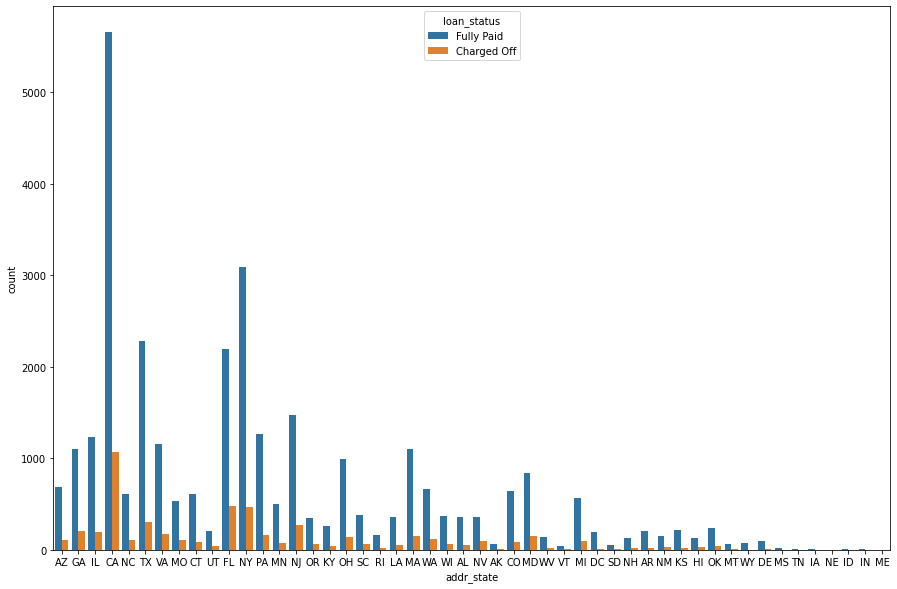

In [144]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x = df.addr_state, hue=df.loan_status)
plt.show()

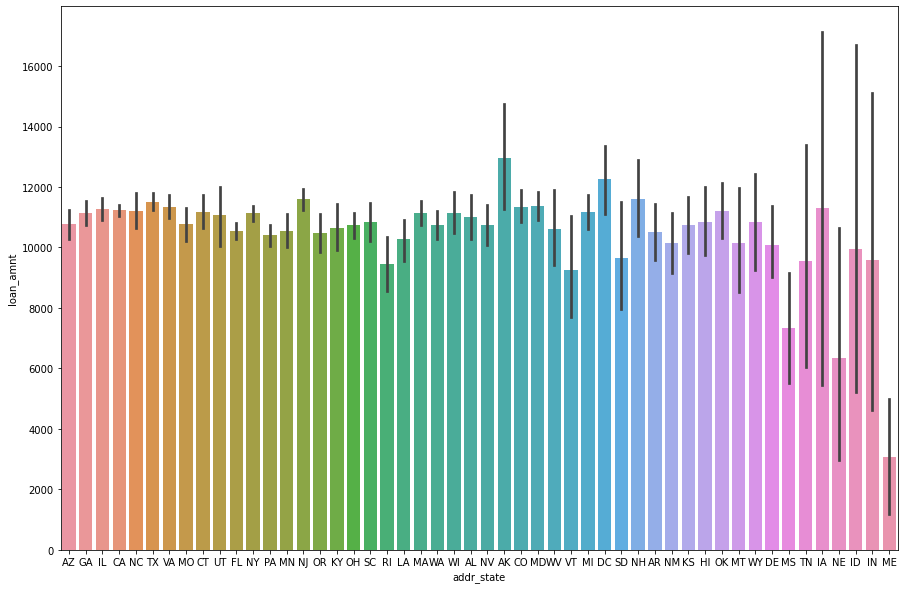

In [124]:
plt.figure(figsize=(15, 10))
sns.barplot(x='addr_state', y='loan_amnt', data=df, estimator=np.mean)
plt.show()

There is not much difference in most states total loan amount.

## <font color='green'> Bivariate Analysis </font>

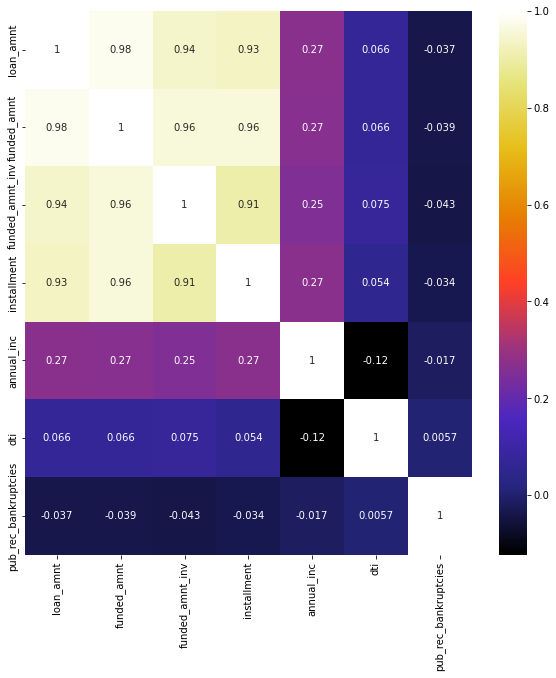

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='CMRmap')
plt.show()

loan_amnt, funded_amnt, funded_amnt_inv and installment are highly positively correlated above 90%.

#### Loan Amount v/s Annual Income

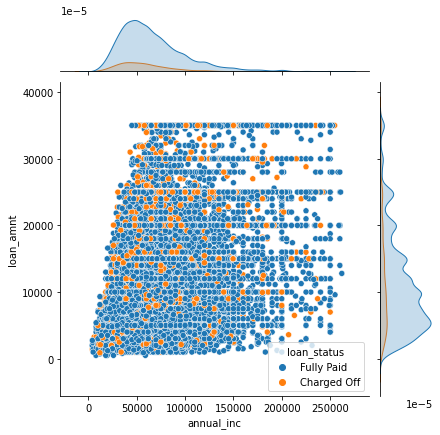

In [137]:
sns.jointplot(x='annual_inc', y='loan_amnt',hue='loan_status', data = df)
plt.show()

There are people with average income lower than 50000 taking loans of 25000 or higher. These would be risky loans. 

#### Interest Rate v/s DTI

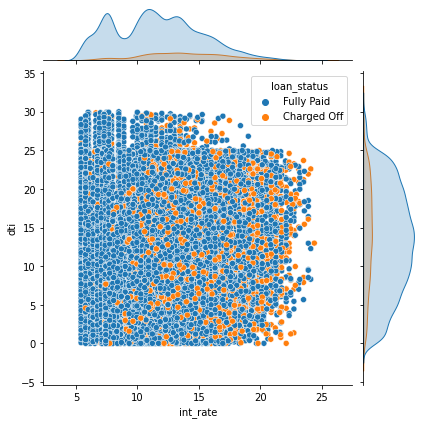

In [75]:
sns.jointplot(x='int_rate', y='dti',hue='loan_status', data = df)
plt.show()

#### Loan Amount v/s Verification Status v/s Loan Status

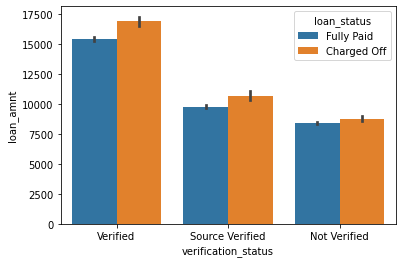

In [122]:
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=df, estimator=np.mean)
plt.show()

- Higher the loan amounts higher will be count of verified customer.  
- We know that larger loans are less in number, but see a higher charge off rate.
- This, combined with previous observation, explains why verfied loans see a higher rate of default. It's not the verified status per se, it's the fact that higher loan amounts are riskier and are also verified more often by Lending Club. 

#### Loan amount vs Grade vs Term

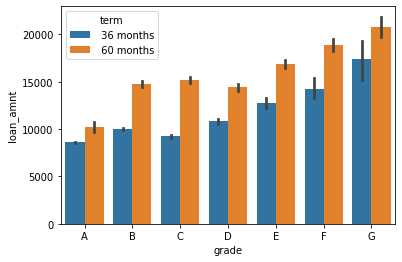

In [125]:
sns.barplot(x='grade', y='loan_amnt', hue="term", data=df, estimator=np.mean, order=['A','B','C','D','E','F','G'])
plt.show()

Higher loan amount are associated with lower grade for longer terms.

#### Loan amount vs Purpose and Loan status

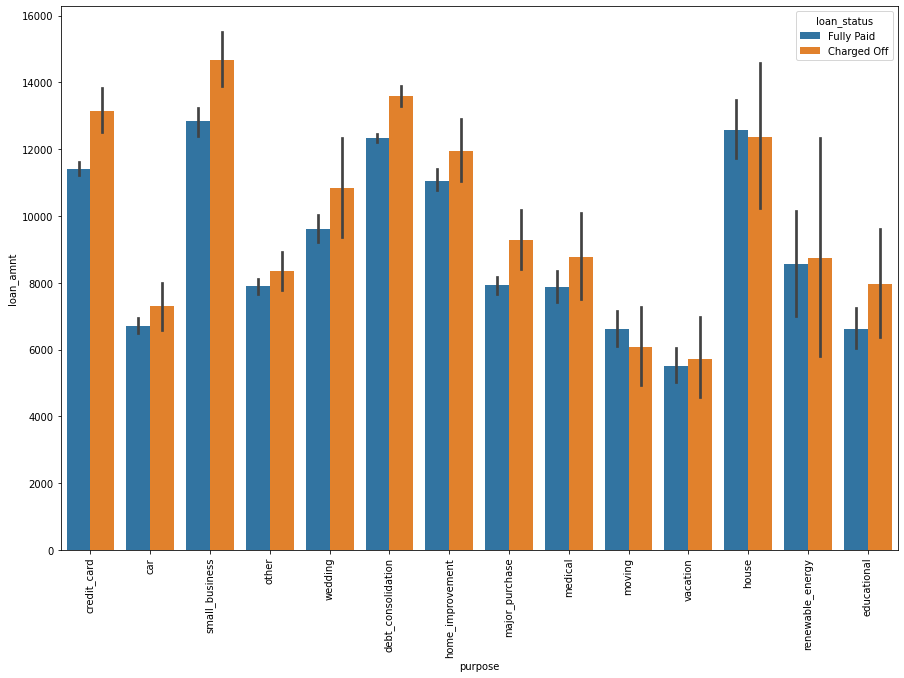

In [129]:
plt.figure(figsize=(15, 10))
sns.barplot(x='purpose', y='loan_amnt', hue="loan_status", data=df, estimator=np.mean)
plt.xticks(rotation=90)
plt.show()

#### Loan amount vs Home Ownership and Loan status

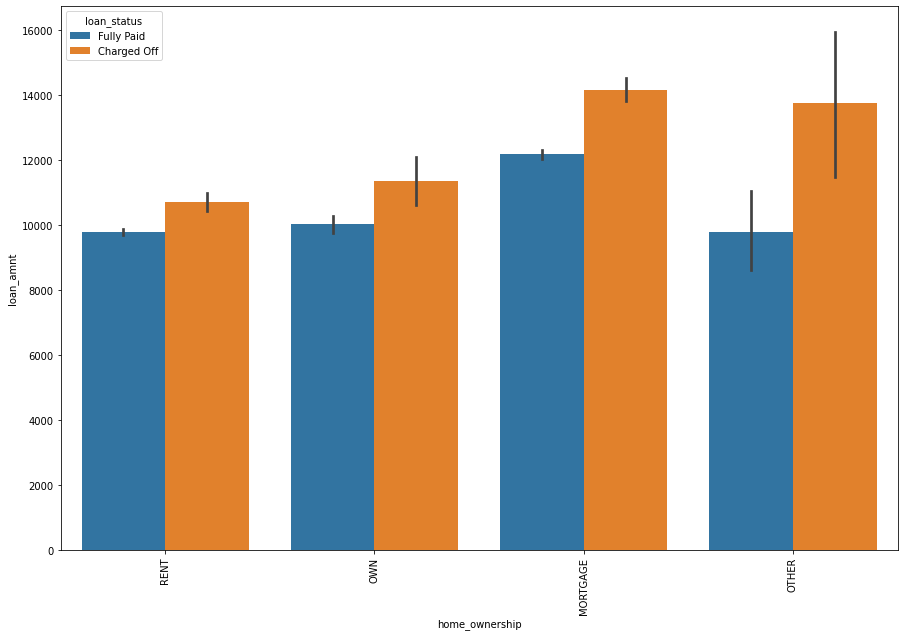

In [130]:
plt.figure(figsize=(15, 10))
sns.barplot(x='home_ownership', y='loan_amnt', hue="loan_status", data=df, estimator=np.mean)
plt.xticks(rotation=90)
plt.show()

#### Interest Rate v/s Loan Amount

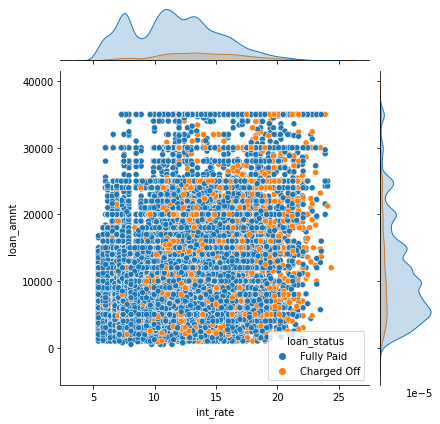

In [136]:
sns.jointplot(x = 'int_rate', y = 'loan_amnt', hue='loan_status', data=df)
plt.show()

#### Address State v/s Loan Amount v/s Loan Status

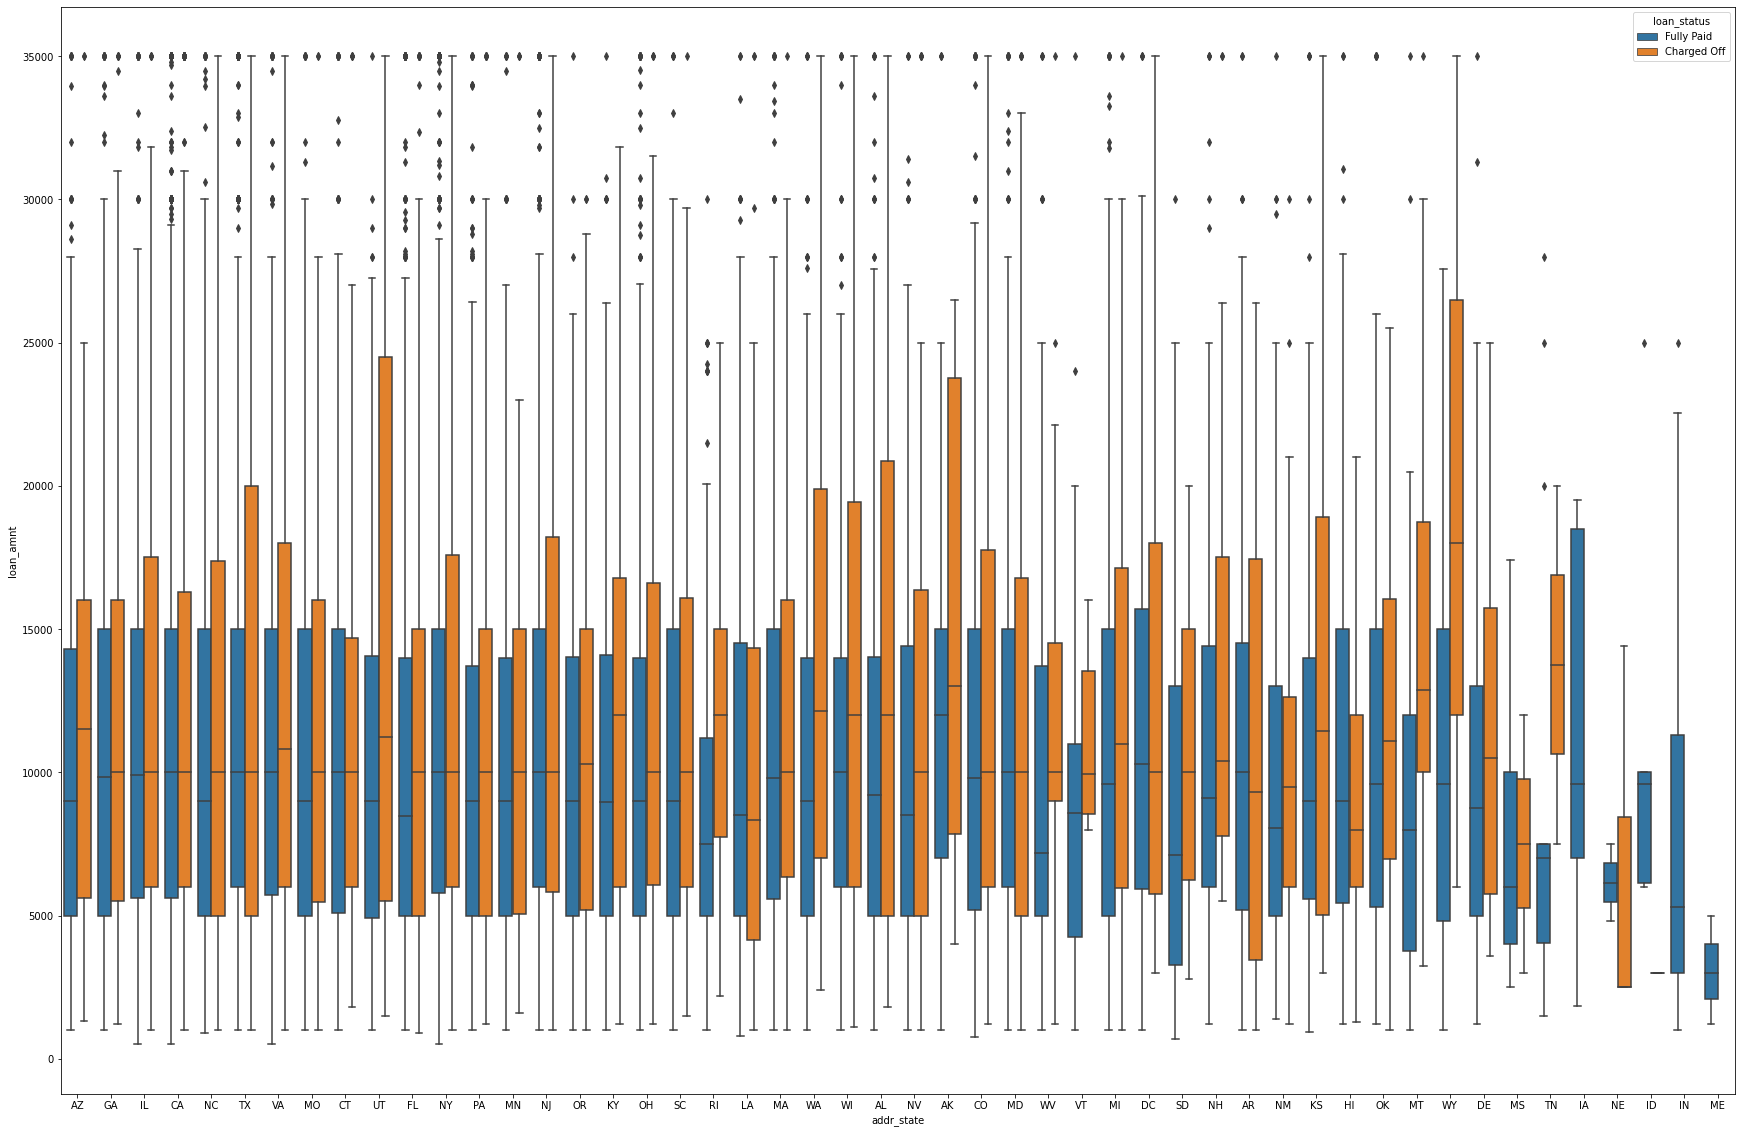

In [141]:
plt.figure(figsize=(30, 20))
sns.boxplot(x=df['addr_state'], y=df['loan_amnt'], hue='loan_status', data=df)
plt.show()